# **1. INTRODUCTION**

======================================================================================================================================================================================================================================
# <center>Milestone Project 2</center>


### <center>Nama  : Catherine Helenna Mulyadi</center>
### <center>Batch : RMT-027</center>


<center>The purpose of this project is to classify which web visitors will likely to make a purchase on a website based on the information kept in the provided dataset. The dataset contains 10 numerical and 8 categorical attributes, in which the target attribute will be "Revenue" as it represents whether the web visitor proceeds to payment (True) or not (False).</center>

======================================================================================================================================================================================================================================

In addition, the information in "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" are for the pages'types  and the corresponding durations the web visitors spent on that page. The duration measurement starts and stops after web visitor clicks to move to other URL page.

The "Bounce Rate", "Exit Rate" and "Page Value" features show the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page is about to the proportion of visitors (in percentage) who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The numbers in the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

The "Page Value" displayes the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. This feature aims to see the relationship between the occurence of special day with completing transactions on the web page. It is measured by the duration between the order date and delivery date. 

Another information in this dataset also include operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# 2. **IMPORT LIBRARIES**

In [1]:
# %pip install --upgrade scikit-learn imbalanced-learn

In [2]:
# %pip install imbalanced-learn

In [3]:
# install this if you do not have it yet
#%pip install phik pandas seaborn

In [4]:
# untuk EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from phik import phik_matrix
from scipy.stats import chi2_contingency

# untuk feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# untuk model training
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# untuk model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score



# untuk model saving
import pickle

# 3.**DATA LOADING**

In [5]:
# keep dataset into a variable
main_data = pd.read_csv("online_shoppers_intention.csv")

# show 5 top data
main_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
main_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# show information about the data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### **INSIGHT:**
- There are 12330 data and 18 columns in this dataset.
- The majority of the columns has numerical data except:
    - Month and VisitorType having categorical data.
    - Weekend and Revenue having boolean data.

# 4. **EXPLORATORY DATA ANALYSIS (EDA)**

## <u>Descriptive Statistics</u>
`Objective`: to observe the main characteristics of data from each column.

In [8]:
# Function to show the descriptive statistical calculations
def desc_stats(data):
    col_names = data.columns.tolist()
    for column in col_names:
        if column != 'Month' and column != 'Weekend' and column != 'Revenue' and column != 'VisitorType':
            # central tendency calculation
            rounded_mean = round(data[column].mean(),2)
            rounded_median = round(data[column].median(),2)

            # dispersion calculation: STD, IQR
            rounded_std = round(data[column].std(),2)
            # for IQR (interquartile range) calculation
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            rounded_iqr = round(q3 -q1,2)
            # upper and lower boundaries
            upper_bound = round((rounded_median + 1.5*rounded_iqr),2)
            lower_bound = round((rounded_median - 1.5*rounded_iqr),2)

            # about data distribution and existence of extreme values indicators
            rounded_skew = round(data[column].skew(),2)
            rounded_kurtosis = round(data[column].kurtosis(),2)
            print(f"Descriptive statistics for column '{column}':")
            print(f"Mean: {rounded_mean}")
            print(f"Median: {rounded_median}")
            print(f"Standard deviation: {rounded_std}")
            print(f"Interquartile range: {rounded_iqr}")
            print(f"Skewness: {rounded_skew}")
            print(f"Kurtosis: {rounded_kurtosis}")

            # to calculate how many outlier data
            outlier_data = data[column][(data[column]< lower_bound)| (data[column]>upper_bound)]
            total_outlier = len(outlier_data)
            outlier_percentage = (total_outlier/len(data[column]))*100
            print(f'There are {total_outlier} outlier data.')
            print(f'The percentage of outlier is: {outlier_percentage:.2f}%.')
            print('\n')

In [9]:
# call the function
desc_stats(main_data)

Descriptive statistics for column 'Administrative':
Mean: 2.32
Median: 1.0
Standard deviation: 3.32
Interquartile range: 4.0
Skewness: 1.96
Kurtosis: 4.7
There are 1069 outlier data.
The percentage of outlier is: 8.67%.


Descriptive statistics for column 'Administrative_Duration':
Mean: 80.82
Median: 7.5
Standard deviation: 176.78
Interquartile range: 93.26
Skewness: 5.62
Kurtosis: 50.56
There are 2062 outlier data.
The percentage of outlier is: 16.72%.


Descriptive statistics for column 'Informational':
Mean: 0.5
Median: 0.0
Standard deviation: 1.27
Interquartile range: 0.0
Skewness: 4.04
Kurtosis: 26.93
There are 2631 outlier data.
The percentage of outlier is: 21.34%.


Descriptive statistics for column 'Informational_Duration':
Mean: 34.47
Median: 0.0
Standard deviation: 140.75
Interquartile range: 0.0
Skewness: 7.58
Kurtosis: 76.32
There are 2405 outlier data.
The percentage of outlier is: 19.51%.


Descriptive statistics for column 'ProductRelated':
Mean: 31.73
Median: 18.0
Sta

### **INSIGHT:**
- All data are positively skewed since the median value is always less than mean value. This observation is supported by positive skewness score results, implying that the data distribution has tail on the right side.

- The data in most columns (except Region) have leptokurtic distribution (kurtosis > 1) in which the more data has a heavy tail compared to the normal distribution. On the other hand, Region has a platykurtic distribution (kurtosis < 1) which means the data has a thinner tail compared to the normal distribution.

- The impact of having heavier tail in the data is shown by high outlier percentages (> 5%) in the columns. For example, the top 5 columns with highest outlier percentages include:
    - Browser at 35.43%.
    - PageValues at 22.14%.
    - Informational at 21.34%.
    - TrafficType at 20.97%
    - Informational_Duration 19.51%

## <u>Visualization of Data Distribution</u>
`Objective`: To view the degree of skewness and kurtosis on each column to decide which feature engineering method to use (capping/trimming and feature scaling.)

`Method`: Histogram.

In [10]:
# make a function to generate histogram for each column
def create_histogram(dataset):
    # prepare the column names in the list
    columns_names = dataset.columns.tolist()
    # create looping to access all columns in the dataset
    for col in columns_names:
        sns.histplot(dataset[col], bins=10, color='pink', edgecolor='black')  # Set the bin number for defining the interval
        plt.xlabel('Range of Values')
        plt.ylabel('Frequency of Data')
        plt.title(f'Histogram of {col}')
        plt.grid(True)  # Add grid lines for the histogram
        plt.show()

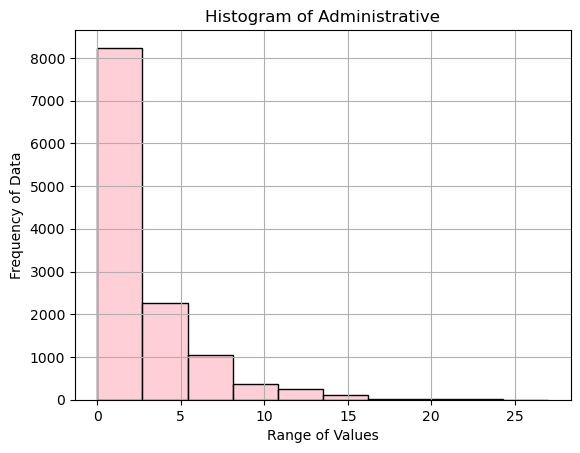

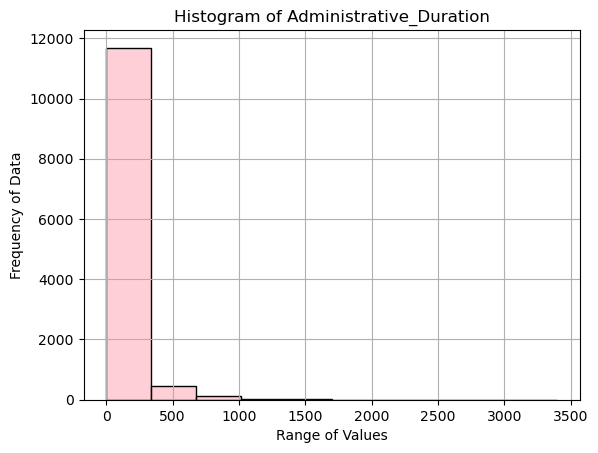

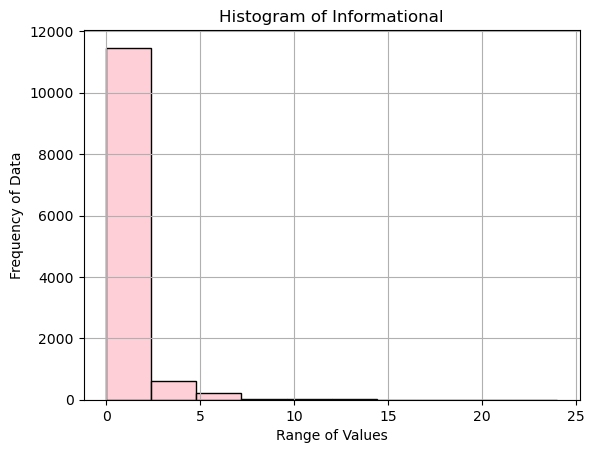

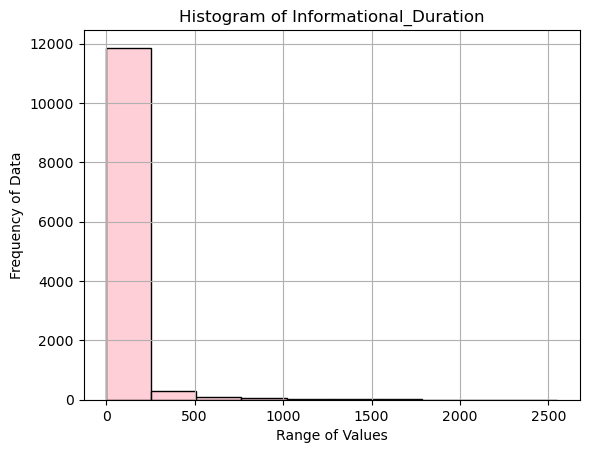

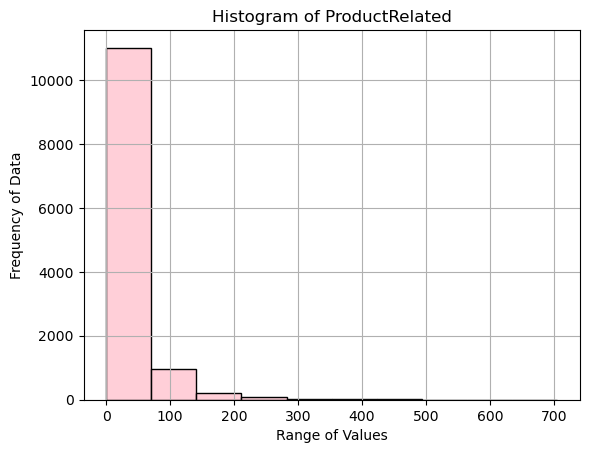

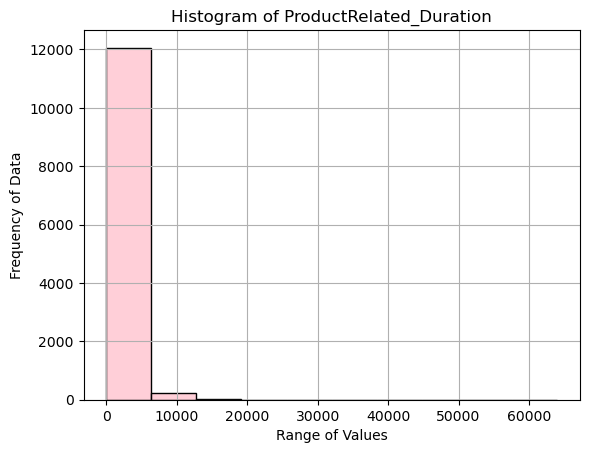

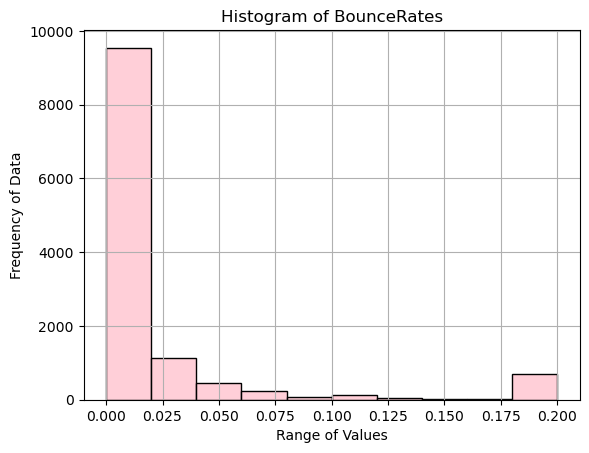

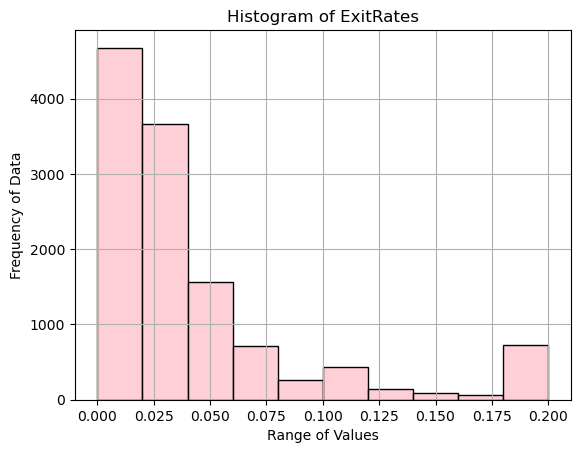

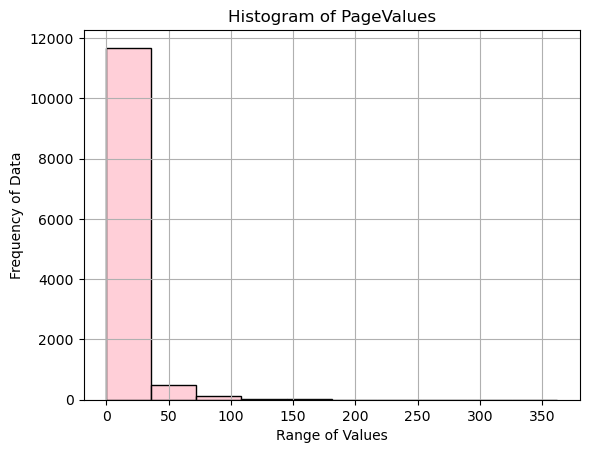

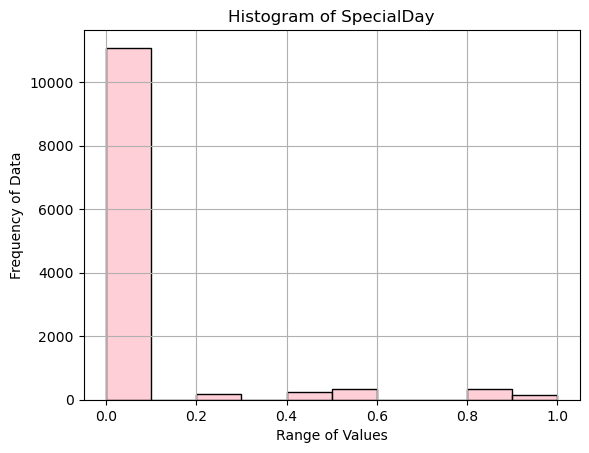

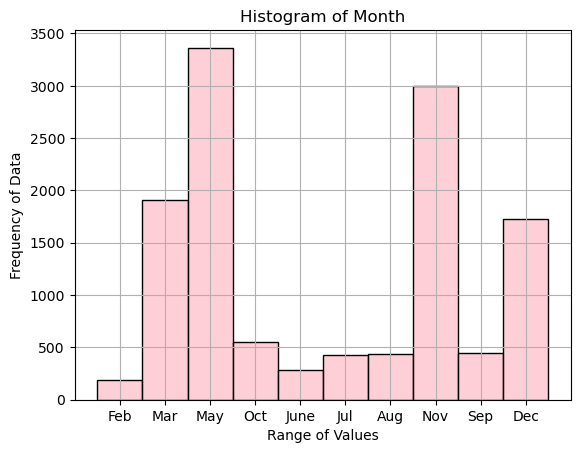

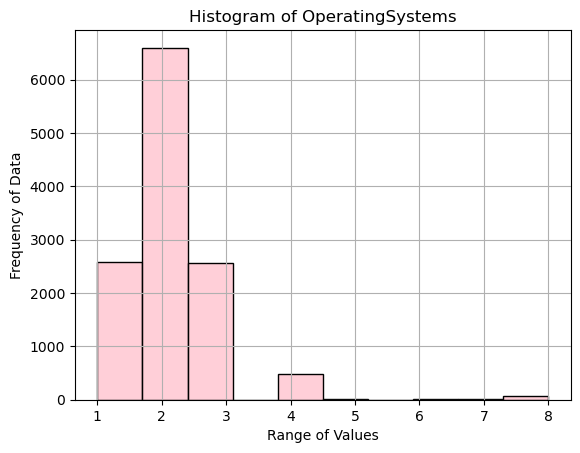

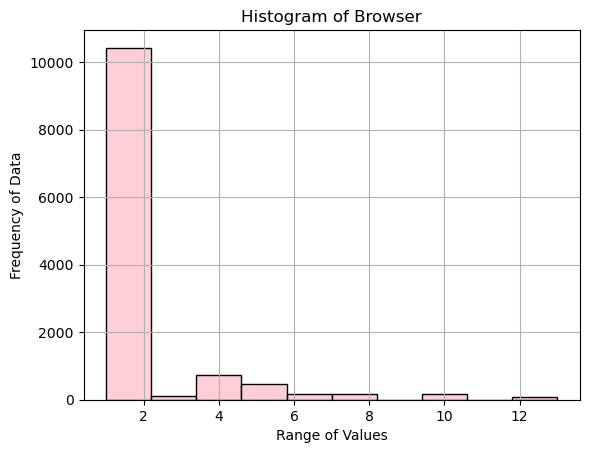

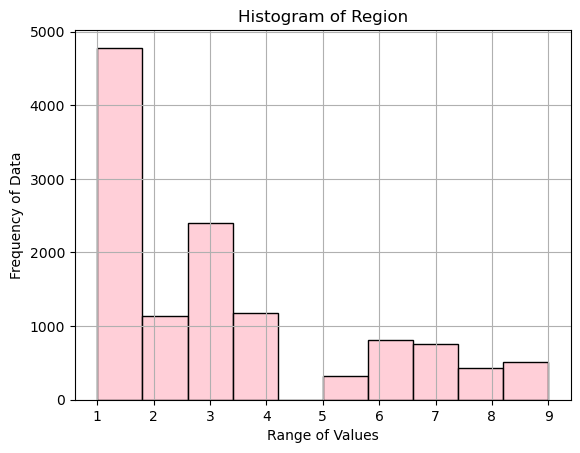

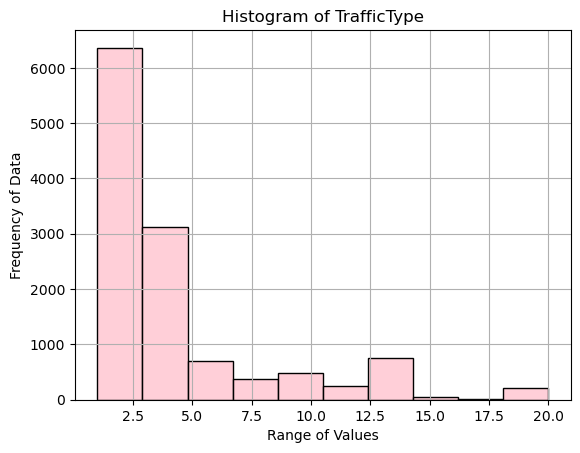

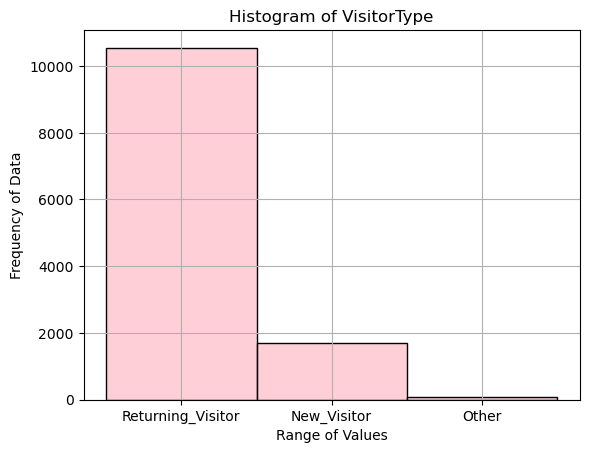

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


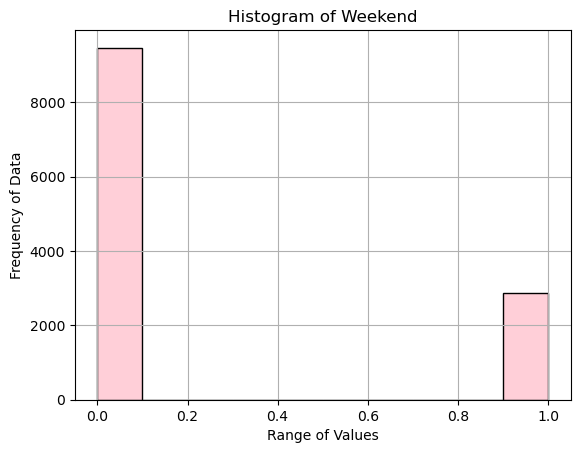

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


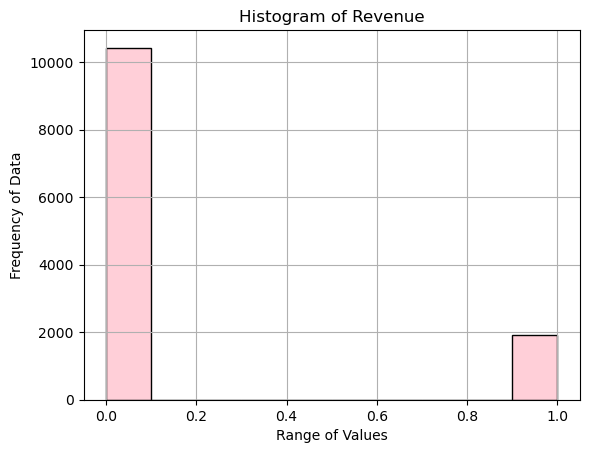

In [11]:
# call the function
create_histogram(main_data)

### **INSIGHT:**
- Based on the histograms, we can conclude several points related to the dataset:
    - Most features excluding the target feature, Revenue, have extreme positively skewed data distribution. those features include: Administration_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.

    - About VisitorType, it is found that there is a category with least number of data called Others. This category is understood as visitor which cannot be classified meither as returning visitors nor new visitors.

    - The target variable, Revenue, is imbalanced. The number of no purchases (Revenue = 0) is approximately 5 times (around 10000 data) of the number of successful purchases (Revenue = 1, almost 2000 data) by the web visitors. This is due to inconsistent web visitor behavioral pattern, compared to returning visitors and new visitors.
    
    - Some columns have random distributions such as Month and SpecialDay, indicating there are special periods where more sucessful purchases by web visitors happen than other periods.

## <u>Check the relationship between Month, Weekend, VisitorType, and Revenue</u>
`Objective`: To understand if certain months or number of successful purchases from number of days before special days have any significance in changing the revenue (number of successful purchases).

`Method`: Phi-K Correlation Heatmap.

`Note`: Find strong Phi-K correlation coefficients (closer to 1 for positive correlation while closer to -1 indicates negative correlation). Investigate also the weak Phi-K correlation coefficients (near to 0). Finally, check the pattern in the whole matrix.
    

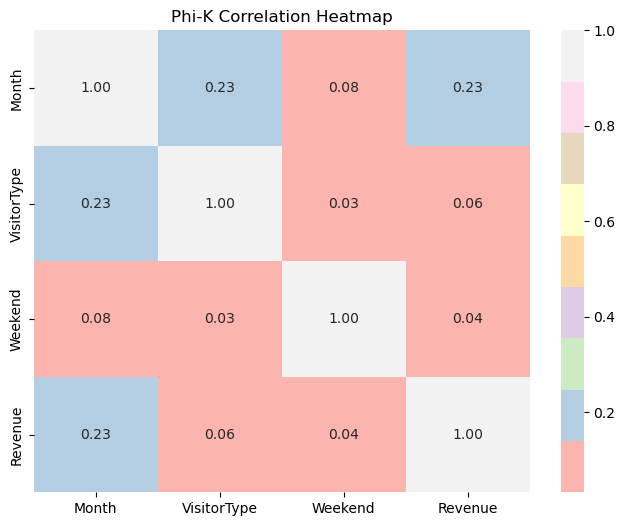

In [12]:
# Put data in a new dataframe
matrix_df = main_data[['Month','VisitorType','Weekend','Revenue']]

# Insert the data into phik_matrix calculation
phi_k_corr = phik_matrix(matrix_df)

# Show the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(phi_k_corr, annot=True, cmap='Pastel1', fmt='.2f')
plt.title('Phi-K Correlation Heatmap')
plt.show()

### **INSIGHT:**
- After performing Phi-K correlation calculation, the result is displayed on the matrix above. From the result, it was found that VisitorType and Revenue has no association with each other since the Phi-K coefficient is very close to zero (0.06).

- Apparently, Weekend has no association with any variables due to low Phi-K coefficients. For instance, with VisitorType is 0.03, with Revenue is 0.04, and with Month is 0.08.

- Meanwhile, Month has a weak positive association with Revenue and VisitorType since the Phi-K coefficient values are 0.23. To confirm whether the relationship has a statistical significance or not, the chi-squared test need to be conducted.

## <u>Compare the difference of revenue generation among visitor and weekend types</u>
`Objective`: To see which visitor and day type has more revenue.

`Method`: Bar plot.

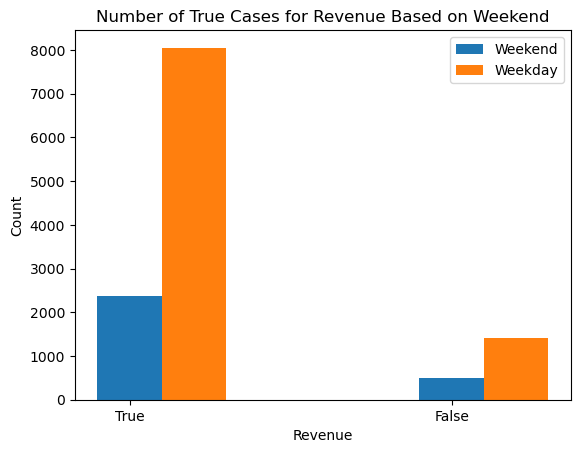

In [13]:
# Between Weekend and Revenue

# Filter the dataset based on the weekend column
t_revenue_weekend = main_data[main_data['Weekend'] == True]['Revenue'].value_counts()
f_revenue_weekend = main_data[main_data['Weekend'] == False]['Revenue'].value_counts()

# Create x-axis positions
x_pos = [0, 1]

# Create bar plot
plt.bar([x_pos[0], x_pos[1]], t_revenue_weekend, width=0.2, label='Weekend')
plt.bar([x_pos[0] + 0.2, x_pos[1] + 0.2], f_revenue_weekend, width=0.2, label='Weekday')

# Adjust x-axis labels
plt.xticks(x_pos, ['True', 'False'])

# Create bar plot
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Number of True Cases for Revenue Based on Weekend')
plt.legend()
plt.show()


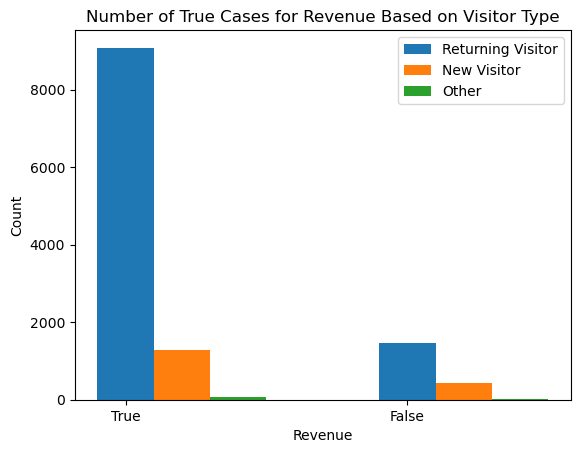

In [14]:
# Filter the dataset based on the visitor type column
returning_visitor = main_data[main_data['VisitorType'] == 'Returning_Visitor']['Revenue'].value_counts()
new_visitor = main_data[main_data['VisitorType'] == 'New_Visitor']['Revenue'].value_counts()
other_visitor = main_data[main_data['VisitorType'] == 'Other']['Revenue'].value_counts()

# Create x-axis positions
x_pos = [0, 1]

# Create bar plot
plt.bar([x_pos[0], x_pos[1]], returning_visitor, width=0.2, label='Returning Visitor')
plt.bar([x_pos[0] + 0.2, x_pos[1] + 0.2], new_visitor, width=0.2, label='New Visitor')
plt.bar([x_pos[0] + 0.4, x_pos[1] + 0.4], other_visitor, width=0.2, label='Other')

# Adjust x-axis labels
plt.xticks(x_pos, ['True', 'False'])

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Number of True Cases for Revenue Based on Visitor Type')
plt.legend()
plt.show()


### **INSIGHT:**
- Based on these bar graphs, there are some trends we can observe as the following:
    - There are actually more successful purchases (Revenue = True) on weekdays (around 8000 times) than weekends (about 2500 times). However, there are also more failed purchases (Revenue = False) on weekdays (approximately 1800) than weekends (approximately 800 times).
    
    - Successful purchases on the website is dominated by the returning visitors at almost 9000 times, followed by new visitors at around 1500 times, and then others which is about 200 times. The same trend is also observed for the number of failed transactions; mostly by returning visitors (more or less 2000 times), then new visitors about 500 times, and other which is less than 200 times.

- From here, we know that both weekend and visitor type are still relevant to our study since they show customers' behavioral pattern in completing a purchase. In instance, successful purchases happen more likely after customers visit the webpage before and during weekdays.

## <u>Chi-squared Test between Categorical Data and Target (Revenue)</u>
`Objective`: To confirm whether the relationship between each categorical or boolean data (Month, Weekend, and VisitorType) has a relationship with Revenue with statistical significance.

`Method`: Chi-squared test.

`The null and alternative hypotheses are defined as below:`

`H0`: There is no association between categorical data (Month, Weekend, VisitorType) and Revenue.

`H1`: There is an association between categorical data (Month, Weekend, VisitorType) and Revenue.

`Note`: if p-value < 0.05 (critical value), then H0 is rejected and H1 is accepted.


In [15]:
# create function to build a contingency table for chi2 test
def contingency_table_maker(dataset,col_name,target_name):
    cat_column_names = dataset[col_name].unique().tolist()
    target_column_names = dataset[target_name].unique().tolist()

    # initialize contingency table with zeros
    # the dimension should be number of unique values from target variable x number of unique values from feature variable
    row_num = len(target_column_names)
    col_num = len(cat_column_names)
    contingency_table = [[0]* col_num for _ in range(row_num)]

    return contingency_table

In [16]:
# Function to perform chi-squared test
def chi2_test_result(con_table):
    # define values to collect from chi2 test
    chi2_stat, p_val, dof, expected = chi2_contingency(con_table)

    # Print results
    print("Chi-squared statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:")
    print(expected)

### **1. Month and Revenue**

In [17]:
# contingency table for month and revenue
con_table_month_rev = contingency_table_maker(main_data,'Month','Revenue')

# keep data from dataframe for both feature and target into list

month_list = main_data['Month'].tolist()
revenue_list = main_data['Revenue'].tolist()


# Populate contingency table
for month, target in zip(month_list, revenue_list):
    # Determine row index based on target category
    if target == False:
        row_index = 0
    elif target == True:
        row_index = 1

    # Determine column index based on month name 
    if month == 'Feb':
        col_index = 0
    elif month == 'Mar':
        col_index = 1
    elif month == 'May':
        col_index = 2
    elif month == 'June':
        col_index = 3
    elif month == 'Jul':
        col_index = 4
    elif month == 'Aug':
        col_index = 5
    elif month == 'Sep':
        col_index = 6
    elif month == 'Oct':
        col_index = 7
    elif month == 'Nov':
        col_index = 8
    elif month == 'Dec':
        col_index = 9
    else:
        continue  # Skip
    
    # Increment count in contingency table
    con_table_month_rev[row_index][col_index] += 1

# Print contingency table
print("Contingency Table for Month and Revenue:")
for row in con_table_month_rev:
    print(row)


Contingency Table for Month and Revenue:
[181, 1715, 2999, 259, 366, 357, 362, 434, 2238, 1511]
[3, 192, 365, 29, 66, 76, 86, 115, 760, 216]


In [18]:
# call function to check p-value using chi-squared statistics
chi2_test_result(con_table_month_rev)

Chi-squared statistic: 384.93476153599426
P-value: 2.2387855164805443e-77
Degrees of freedom: 9
Expected frequencies:
[[ 155.5270073  1611.90218978 2843.43941606  243.43357664  365.15036496
   365.99562044  378.67445255  464.04525547 2534.07591241 1459.75620438]
 [  28.4729927   295.09781022  520.56058394   44.56642336   66.84963504
    67.00437956   69.32554745   84.95474453  463.92408759  267.24379562]]


### **2. VisitorType and Revenue**

In [19]:
# contingency table for visitor type and revenue
con_table_visitor_rev = contingency_table_maker(main_data,'VisitorType','Revenue')

# keep data from dataframe for both feature and target into list

visitor_type_list = main_data['VisitorType'].tolist()
revenue_list = main_data['Revenue'].tolist()


# Populate contingency table
for visitor, target in zip(visitor_type_list , revenue_list):
    # Determine row index based on target category
    if target == False:
        row_index = 0
    elif target == True:
        row_index = 1

    # Determine column index based on visitor type
    if visitor == 'Returning_Visitor':
        col_index = 0
    elif visitor == 'New_Visitor':
        col_index = 1
    elif visitor == 'Other':
        col_index = 2
    else:
        continue  # Skip
    
    # Increment count in contingency table
    con_table_visitor_rev[row_index][col_index] += 1

# Print contingency table
print("Contingency Table for Visitor Type and Revenue:")
for row in con_table_visitor_rev:
    print(row)


Contingency Table for Visitor Type and Revenue:
[9081, 1272, 69]
[1470, 422, 16]


In [20]:
# call function to check p-value using chi-squared statistics
chi2_test_result(con_table_visitor_rev)

Chi-squared statistic: 135.2519228192047
P-value: 4.269904152293867e-30
Degrees of freedom: 2
Expected frequencies:
[[8918.29051095 1431.86277372   71.84671533]
 [1632.70948905  262.13722628   13.15328467]]


### **3. Weekend and Revenue**

In [21]:
# contingency table for visitor type and revenue
con_table_weekend_rev = contingency_table_maker(main_data,'Weekend','Revenue')

# keep data from dataframe for both feature and target into list

day_type_list = main_data['Weekend'].tolist()
revenue_list = main_data['Revenue'].tolist()


# Populate contingency table
for weekend, target in zip(day_type_list , revenue_list):
    # Determine row index based on target category
    if target == False:
        row_index = 0
    elif target == True:
        row_index = 1

    # Determine column index based on day type
    # if it's weekend, it's stored on row with index 0
    if weekend == True:
        col_index = 0
    elif weekend == False:
        col_index = 1
    else:
        continue  # Skip
    
    # Increment count in contingency table
    con_table_weekend_rev[row_index][col_index] += 1

# Print contingency table
print("Contingency Table for Weekend and Revenue:")
for row in con_table_weekend_rev:
    print(row)


Contingency Table for Weekend and Revenue:
[2369, 8053]
[499, 1409]


In [22]:
# call function to check p-value using chi-squared statistics
chi2_test_result(con_table_weekend_rev)

Chi-squared statistic: 10.390978319534856
P-value: 0.0012663251061221968
Degrees of freedom: 1
Expected frequencies:
[[2424.19270073 7997.80729927]
 [ 443.80729927 1464.19270073]]


### **INSIGHT:**
- To prove statistically significant relationship between the features and revenue, we need to refer to p-value:
    - p-value Month and Revenue: 2.2387855164805443e-77
    - p-value Visitor Type and Revenue: 4.269904152293867e-30
    - p-value Weekend and Revenue: 0.0012663251061221968

- All of the p-values are less than 0.05, implying that there is an association between categorical data (Month, Weekend, VisitorType) and Revenue.

- Despite Weekend has no association with Revenue according to Phi-K correlation matrix, it still has statistically significant relationship based on chi-squared test.

## <u>Check the correlation of all numerical features in the dataset</u>
`Objective`: To compare which features having stronger correlation with Revenue compared to other features. This is useful for feature selection.

`Method`: Correlation Matrix. The numbers represented on each plot are Pearson correlation coefficient which is representing linear relationship between the variables.


In [23]:
# make a new dataframe containing only numerical and boolean data
data_corr_df = main_data.drop(['VisitorType','Month'], axis = 1)

# create correlation matrix from the dataset
correlation_matrix = data_corr_df.corr()

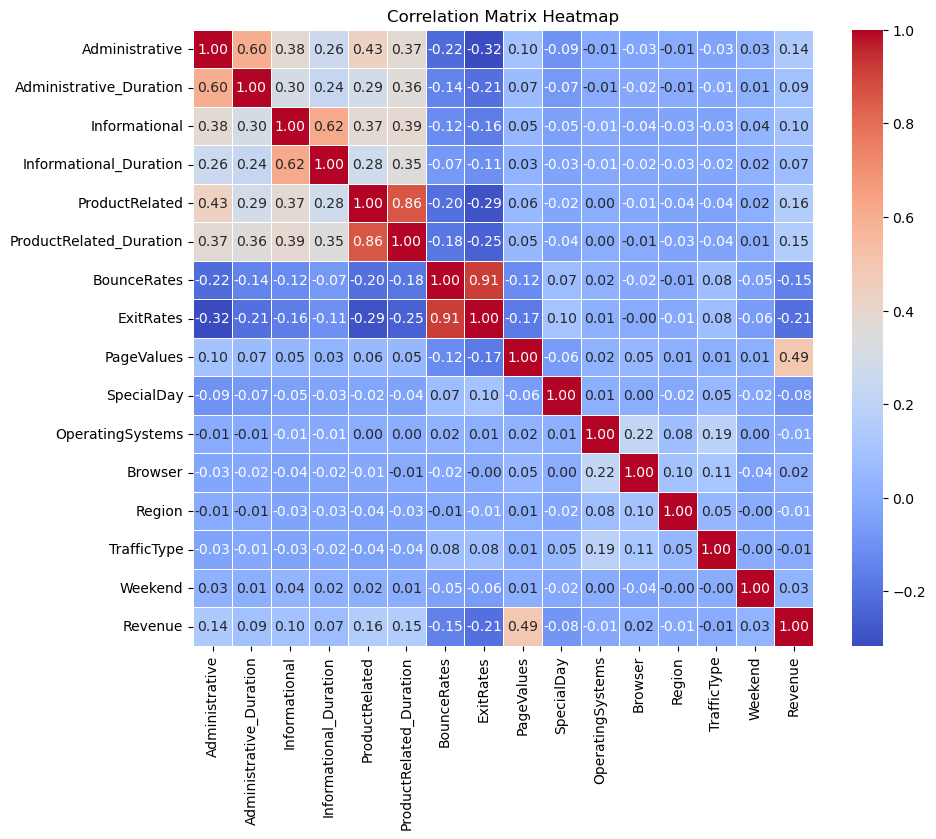

In [24]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### **INSIGHT:**
- Among all features, the top five features with strongest correlation with Revenue is:
    - PageValues (0.49)
    - ExitRates (-0.21)
    - ProductRelated (0.16)
    - ProductRelated_Duration (0.15)
    - Administrative (0.14)

- Some features have moderately strong linear relationship with one and another (0.3 < correlation coefficient <= 0.7), these include:
    - Administrative and Administrative_Duration (0.60).
    - Informational and Informational_Duration (0.62).
    - ProductRelated and Administrative (0.43).
    - Informational and ProductRelated (0.37).
    - ProductRelated_Duration and Informational (0.37).
    - ProductRelated_Duration and Administrative_Duration (0.36).
    - Administrative and ExitRates (-0.32).

- A few features also have strong linear relationship with one and another (correlation coefficient > 0.7), these include:
    - ProductRelated and ProductRelated_Duration (0.86).
    - BounceRates and ExitRates (0.91).

- Weekend shows no linear relationship with any variables, including Revenue (coefficient = 0.03).

- So, features with many moderate linear relationship (coefficient is above 0.3) with other features are (or multicolinear features):
    - ProductRelated_Duration, Administrative, ProductRelated, Informational (with 5 features).
    - Administrative_Duration (with 3 features)
    - ExitRate (with 2 features).
    - BounceRate (with 1 feature).

- Next, features  shows no linear relationship with any variables, including Revenue are:
    - Weekend (0.03)
    - Region (0.01)
    - TrafficType (0.01)
    - SpecialDay (-0.08)
    - OperatingSystems (0.01)

- where number in brackets represent correlation coefficient of the feature with Revenue.

# **5. FEATURE ENGINEERING**

## i. <u>Feature Creation</u>

`Spliting dataset`

`Handling cardinality and outlier`

### **a. Splitting dataset:**

In [25]:
# define X and y
X = main_data.drop("Revenue", axis = 1)
y= main_data['Revenue']

In [26]:
# splitting dataset, make sure the distribution of y values in train and test set is equal (stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((9864, 17), (2466, 17))

In [27]:
# One of multicolinear feature which has high correlation coefficients with most features is ProductRelated_Duration. 
# So, another train and test sets without the column is created.

X_train_no_osr = X_train.drop(['OperatingSystems','Region'], axis = 1)
X_test_no_osr = X_test.drop(['OperatingSystems','Region'], axis = 1)

# check dimension of each set
X_train_no_osr.shape, X_test_no_osr.shape

((9864, 15), (2466, 15))

### **b. Handling cardinality:**

In [28]:
# check the number of unique values in each column
def find_unique_data(data):
    cols = data.columns.tolist()
    # conduct looping to access all columns
    for col in cols:
        print(f'The number of unique values in {col} is: {len(data[col].unique())}')
        print(data[col].unique())

In [29]:
# call the function to check unique values in X_train
find_unique_data(X_train)

The number of unique values in Administrative is: 27
[ 7  3  9  0  4  1  8  2  5 13 10  6 11 12 17 14 15 24 16 18 22 20 21 23
 19 27 26]
The number of unique values in Administrative_Duration is: 2814
[132.        139.        320.2708333 ... 140.0666667 322.9416667
 223.375    ]
The number of unique values in Informational is: 17
[ 4  0  2  1  6  7  3  8 24  5 12  9 10 16 14 11 13]
The number of unique values in Informational_Duration is: 1063
[256.0666667   0.        298.3333333 ... 160.        273.
 477.6      ]
The number of unique values in ProductRelated is: 293
[125  10  51  12   2  14   6  15  17   9  18  13  72  19  64  11   8  34
  77  37   7  38  29  36  24   1  20  49  47  58  41  22  62   3  39  16
  23   4  59  21 262 357  33  27 188  32  71  45  52  31 106  93  30  48
  78  46 111 144 131  43  25 705  70  67  73  56   5  53  40  28  82  35
 109 122 166  81   0  89 150  83  26  87 120 340  98  42 132 486  94 171
  85  50 283  54  91 145 162 140  55  60  90 154 101  68  44 

In [30]:
# call the function to check unique values in X_test
find_unique_data(X_test)

The number of unique values in Administrative is: 21
[ 0  7  1  2  3  6 11 17  4  5  9  8 16 10 14 15 12 13 22 18 24]
The number of unique values in Administrative_Duration is: 928
[0.00000000e+00 1.50375000e+02 2.72000000e+01 1.37000000e+02
 8.90625000e+01 4.00000000e+01 7.39583333e+01 2.02425439e+02
 9.00000000e+00 3.20000000e+01 8.46666667e+01 8.10000000e+01
 9.85000000e+01 6.30000000e+01 6.77500000e+01 1.95486472e+02
 7.75000000e+01 2.71200000e+02 1.02533333e+02 5.75000000e+01
 1.52875000e+02 7.40000000e+01 1.90000000e+01 2.50500000e+02
 7.93500000e+02 2.64809524e+02 1.90250000e+02 2.93000000e+02
 4.02000000e+01 1.40000000e+01 1.29000000e+02 1.78799550e+02
 1.69975000e+02 1.05000000e+02 1.00100000e+02 1.46000000e+02
 1.48000000e+02 9.97500000e+01 6.69000000e+01 3.16140503e+02
 4.74000000e+01 2.25000000e+01 8.95000000e+01 5.25000000e+01
 5.30000000e+01 1.50500000e+02 7.16666667e+01 3.76500000e+02
 3.40000000e+01 3.17914286e+02 1.80000000e+01 1.65916667e+02
 4.02500000e+01 2.51000000

### **INSIGHT:**
- The most important features to handle cardinality are categorical data: Month and VisitorType since numerical data can be left as they are. Checking unique values for those columns containing categorical data was performed in both X_train and X_test sets.

- Column Month has 10 unique categories: 'Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'. 

- Column VisitorType has 3 unique categories: 'Returning_Visitor' 'New_Visitor' 'Other'.

- However, the categories in Month can be encoded using ordinal encoder since the months can be arranged in an order.

- Meanwhile, VisitorType only has three categories which can be encoded with one hot encoder.

- Therefore, there is no need for reducing the number of categories in these columns by cardinality handling.

### **c. Handling outlier:**
`Objective`: to reduce extreme values which will affect the modelling process.

`Method`: Capping.

`Note`:
  - Capping for top five highest outlier percentages. The features are Browser, PageValues, Informational, TrafficType, and Informational_Duration. The capping method uses quantiles since the data variation is too small (small iqr). By setting fold = 0.01, the capping will be performed on top 1% extreme values.

In [31]:
# capping implementation
columns_cap = ['Browser','PageValues','Informational','TrafficType','Informational_Duration']
winsoriser_function = Winsorizer(capping_method='quantiles',
                             tail='both',
                           #  capping at 99th percentile; remove top 1% extreme values
                             fold=0.01,
                             variables=columns_cap)

# fit and transform the train and test values.
X_train_capped = winsoriser_function.fit_transform(X_train)
X_test_capped = winsoriser_function.transform(X_test)

In [32]:
# capping for other train and test sets
columns_cap = ['Browser','PageValues','Informational','TrafficType','Informational_Duration']
winsoriser_function2 = Winsorizer(capping_method='quantiles',
                             tail='both',
                            #  capping at 99th percentile; remove top 1% extreme values
                             fold=0.01,
                             variables=columns_cap)

# fit and transform the train and test values.
X_train_no_prod_capped = winsoriser_function2.fit_transform(X_train_no_osr)
X_test_no_prod_capped = winsoriser_function2.transform(X_test_no_osr)

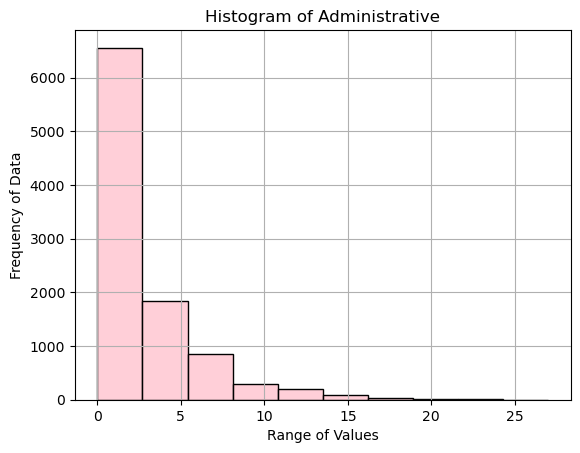

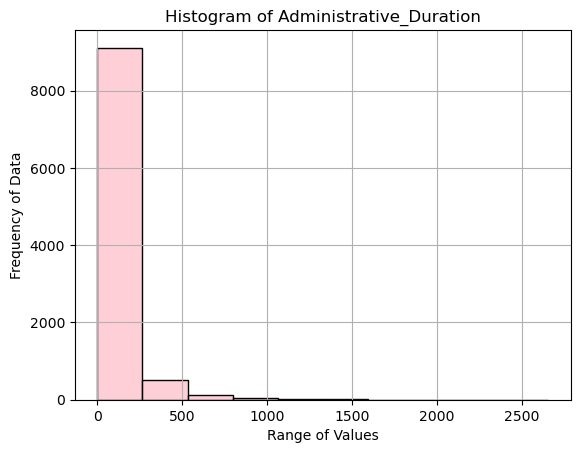

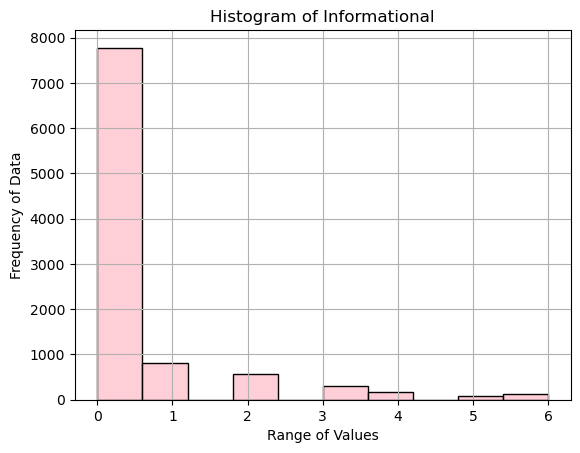

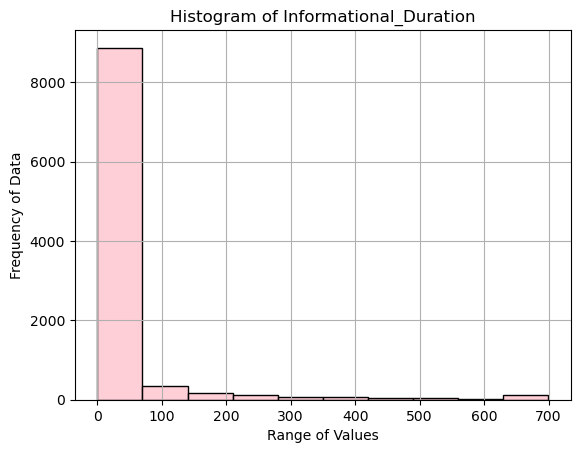

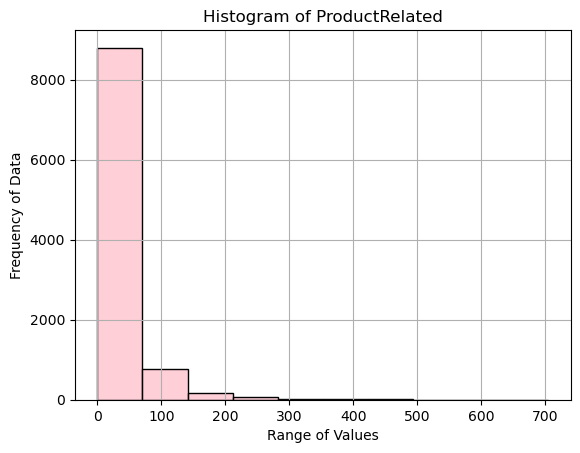

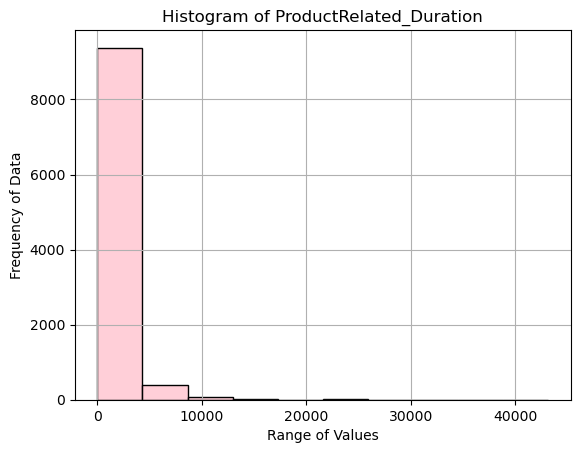

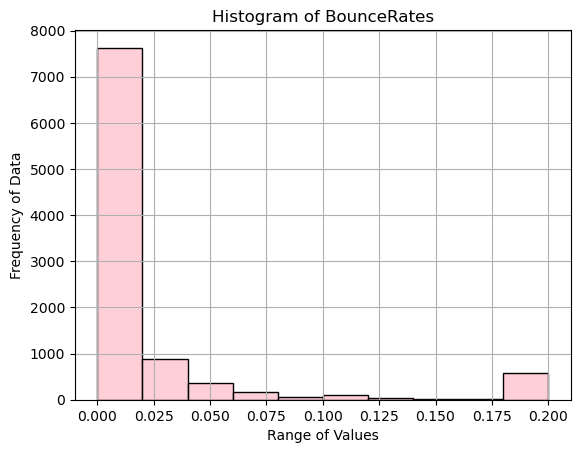

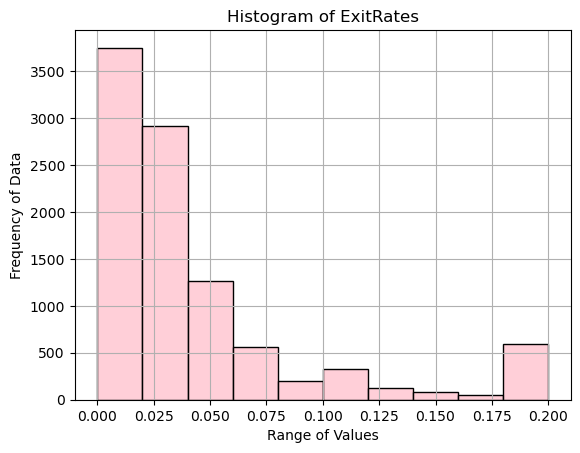

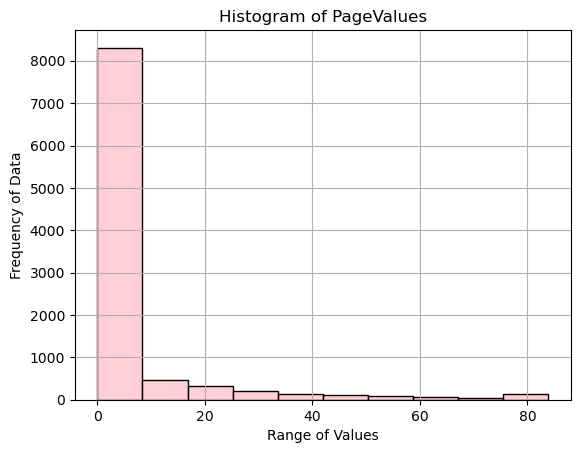

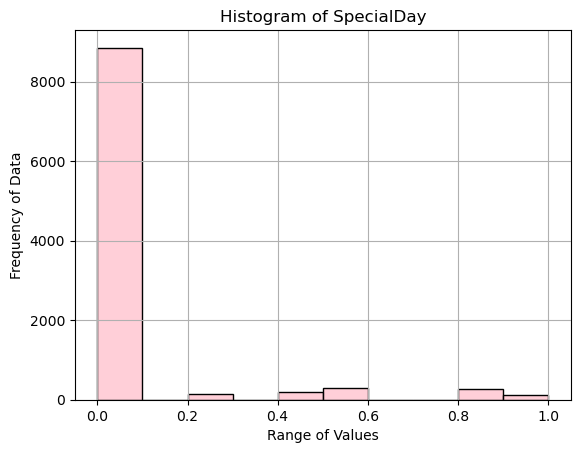

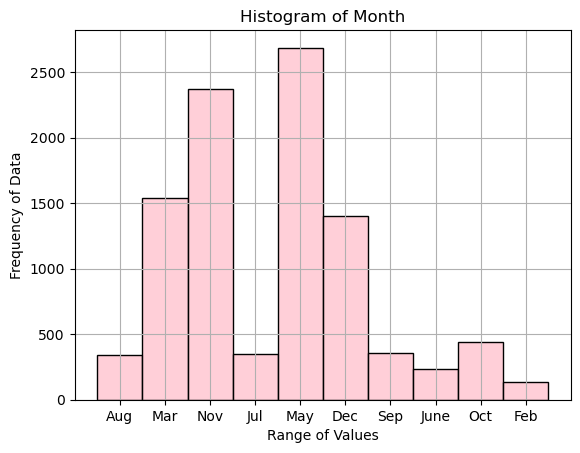

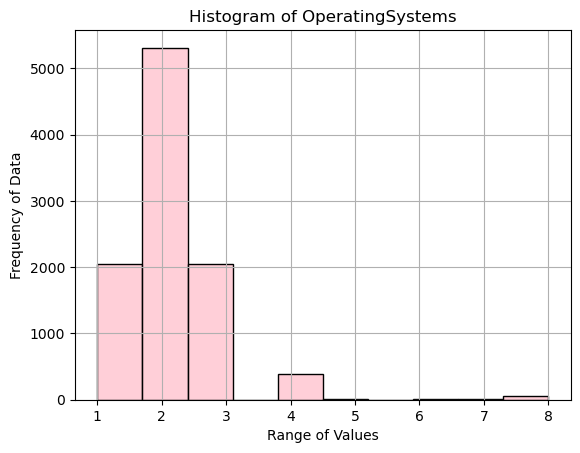

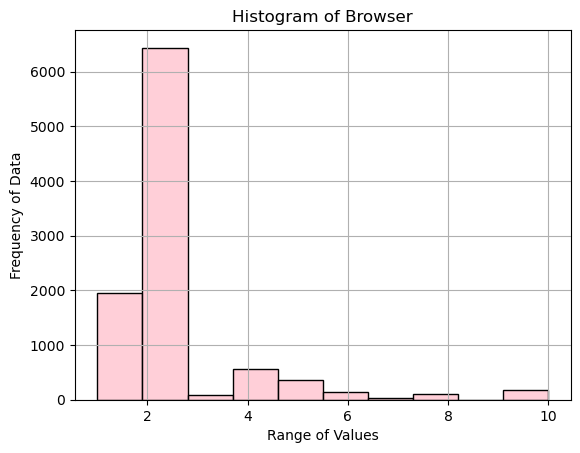

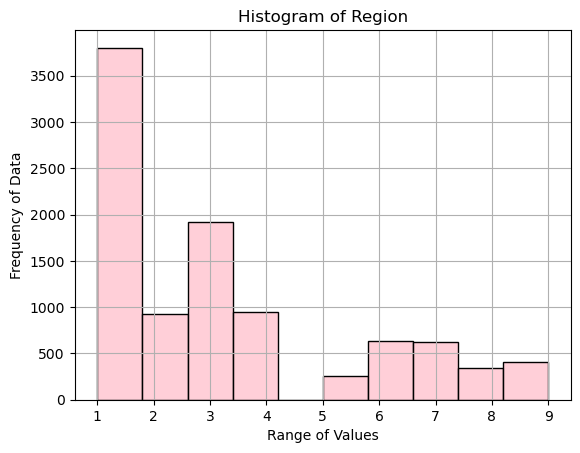

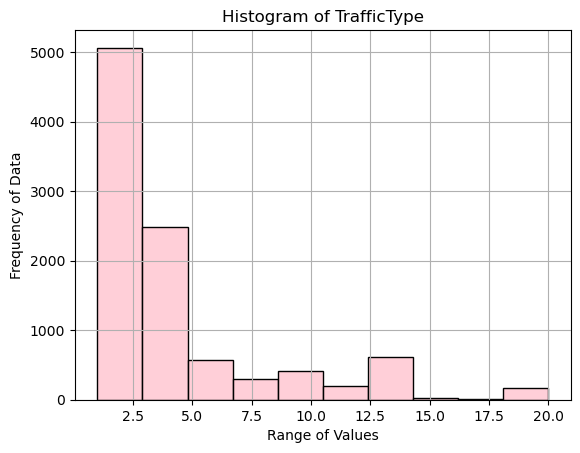

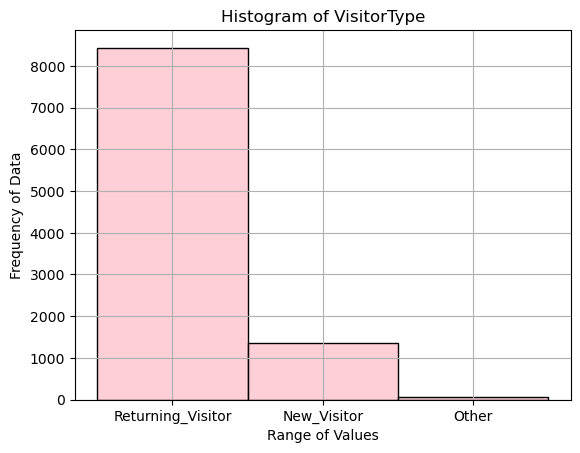

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


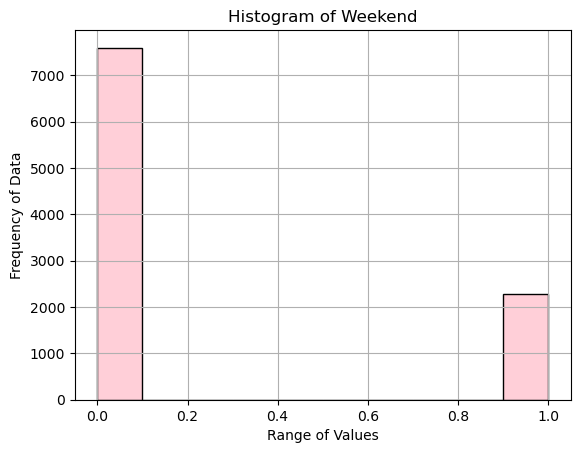

In [33]:
# show with histogram, choose X_train_capped to compare with initial data distribution among the features
create_histogram(X_train_capped)

### **INSIGHT:**
- After capping, the distribution of the data becomes less concentrated on certain intervals for all columns. For example, the column Browser has less positive skewness compared to raw data on descriptive statistics section.

## ii. <u>Feature Extraction, Transformation, dan Selection</u>
- Encoding, Feature Scaling, PCA

### **a. Separate numeric and categorical data:**

`Objective`: to perform feature scaling on numerical features and encoding on categorical features.

In [34]:
# separate numerical and categorical data
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','bool']).columns.tolist()

# another set
num_cols2 = num_cols.copy() 
# num_cols2.remove("ProductRelated_Duration")
num_cols2.remove("OperatingSystems")
# num_cols2.remove("Informational_Duration")
num_cols2.remove("Region")
# get the column names

print('List of column names for numerical data: ', num_cols)
print('List of column names for numerical data without ProductRelated_Duration,Administrative, OperatingSystems: ', num_cols2)
print('List of column names for categorical data:: ', cat_cols)

List of column names for numerical data:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
List of column names for numerical data without ProductRelated_Duration,Administrative, OperatingSystems:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Browser', 'TrafficType']
List of column names for categorical data::  ['Month', 'VisitorType', 'Weekend']


In [35]:
# split numerical and categorical data for preprocessing

# train set 1
X_train_num = X_train_capped[num_cols]
X_train_cat = X_train_capped[cat_cols]

# test set 1
X_test_num = X_test_capped[num_cols]
X_test_cat = X_test_capped[cat_cols]

# train set 2
X_train_num_2 = X_train_no_prod_capped[num_cols2]
X_train_cat_2 = X_train_no_prod_capped[cat_cols]

# test set 2
X_test_num_2 = X_test_no_prod_capped[num_cols2]
X_test_cat_2 = X_test_no_prod_capped[cat_cols]

# show example
X_train_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
6885,7,132.000000,4,256.066667,125,3674.803673,0.023134,0.032706,5.613708,0.0,3,2,3,13
962,3,139.000000,0,0.000000,10,277.142857,0.000000,0.007692,0.000000,0.0,3,2,1,2
10392,9,320.270833,2,298.333333,51,1788.370821,0.016970,0.014710,8.216178,0.0,3,2,3,2
648,3,36.000000,1,395.000000,12,343.583333,0.000000,0.014286,0.000000,0.0,2,2,1,2
5796,0,0.000000,0,0.000000,2,58.600000,0.000000,0.050000,0.000000,0.0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8525,0,0.000000,2,3.000000,22,1904.183333,0.016667,0.052778,0.000000,0.0,2,2,2,11
1415,0,0.000000,0,0.000000,10,130.166667,0.055556,0.083333,26.661333,0.0,3,2,1,8
7202,2,14.200000,0,0.000000,53,2016.566667,0.003636,0.036364,8.154361,0.0,2,2,3,3
9078,23,322.941667,0,0.000000,62,3142.941176,0.003038,0.019685,7.311892,0.0,2,2,1,10


In [36]:
# show the content
X_train_cat

,Month,VisitorType,Weekend
6885,Aug,Returning_Visitor,False
962,Mar,Returning_Visitor,True
10392,Nov,Returning_Visitor,True
648,Mar,New_Visitor,False
5796,Jul,Returning_Visitor,False
...,...,...,...
8525,Nov,Returning_Visitor,False
1415,Mar,Returning_Visitor,False
7202,June,Returning_Visitor,False
9078,Nov,Returning_Visitor,True


In [37]:
# show the content
X_train_cat_2

,Month,VisitorType,Weekend
6885,Aug,Returning_Visitor,False
962,Mar,Returning_Visitor,True
10392,Nov,Returning_Visitor,True
648,Mar,New_Visitor,False
5796,Jul,Returning_Visitor,False
...,...,...,...
8525,Nov,Returning_Visitor,False
1415,Mar,Returning_Visitor,False
7202,June,Returning_Visitor,False
9078,Nov,Returning_Visitor,True


### **INSIGHT:**

- The splitting based on data type is successful.

### **b. Encoding:**

`Objective`: to transform categorical data into numeric forms which can be understood by the model.

`Method`: Label encoding for target variable (Revenue), one hot encoding for VisitorType, and ordinal encoding for Month and Weekend.

#### <u>Pipeline Implementation:</u>

`Objective`: reduce number of code lines to perform encoding.

In [38]:
# Define encoders
ordinal_encoder_month = OrdinalEncoder(categories=[['Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])

onehot_encoder_visitortype = OneHotEncoder()
onehot_encoder_visitortype.fit(X_train_cat[['VisitorType']])

# ordinal_encoder_weekend = OrdinalEncoder(categories=[['True', 'False']])


# Define column transformer
column_transformer_process = ColumnTransformer([
    ('ordinal_encoding_month', ordinal_encoder_month, ['Month']),
    ('onehot_encoding_visitortype', onehot_encoder_visitortype, ['VisitorType']),
    # ('ordinal_encoding_weekend', ordinal_encoder_weekend, ['Weekend'])
], remainder='passthrough')  # Pass through the remaining columns

# Define pipeline
encoding_pipeline = Pipeline([
    ('column_transformer', column_transformer_process)
])

# Fit and transform the data
X_train_encoded = encoding_pipeline.fit_transform(X_train_cat)
X_test_encoded = encoding_pipeline.transform(X_test_cat)

# second set
X_train_encoded_2 = encoding_pipeline.fit_transform(X_train_cat_2)
X_test_encoded_2 = encoding_pipeline.transform(X_test_cat_2)

encoded_feature_names = onehot_encoder_visitortype.get_feature_names_out(['VisitorType'])

columns = ['Month'] + list(encoded_feature_names) + ['Weekend']


# Convert transformed data to a DataFrame
X_train_encoded_final = pd.DataFrame(X_train_encoded, columns=columns)
X_test_encoded_final = pd.DataFrame(X_test_encoded, columns=columns)

# second set
X_train_encoded_2_final = pd.DataFrame(X_train_encoded_2, columns=columns)
X_test_encoded_2_final = pd.DataFrame(X_test_encoded_2, columns=columns)

# how example of encoding result
X_train_encoded_final


,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend
0,6.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0
2,9.0,0.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0
4,5.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
9859,9.0,0.0,0.0,1.0,0.0
9860,1.0,0.0,0.0,1.0,0.0
9861,4.0,0.0,0.0,1.0,0.0
9862,9.0,0.0,0.0,1.0,1.0


#### <u>Label Encoding:</u>

`Objective`: to convert target variable, Revenue, and feature Weekend which have boolean data into binary form.

In [39]:
# Label encoding for target = Revenue
label_e = LabelEncoder()
# fitting
label_e.fit(y_train)

# transform data
y_train_encoded = label_e.transform(y_train)
y_test_encoded = label_e.transform(y_test)
# show encoded result
y_train_encoded

array([0, 0, 1, ..., 1, 0, 1])

In [40]:
# make sure no null values
X_train_encoded_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month                          9864 non-null   float64
 1   VisitorType_New_Visitor        9864 non-null   float64
 2   VisitorType_Other              9864 non-null   float64
 3   VisitorType_Returning_Visitor  9864 non-null   float64
 4   Weekend                        9864 non-null   float64
dtypes: float64(5)
memory usage: 385.4 KB


### **INSIGHT:**
- All encoding process are successfully carried out with no missing values along the way.

### **b. Feature Scaling**

- `Scaling type`: MinMaxScaler()
- `Reason`: The data has many outliers, however, they are still included to observe special situations where customers would make a purchase on the web. 

In [41]:
# reset index first
# Reset index of X_train_encoded
X_train_num.reset_index(drop=True, inplace=True)
X_test_num.reset_index(drop=True, inplace=True)

# second train and test set
X_train_num_2.reset_index(drop=True, inplace=True)
X_test_num_2.reset_index(drop=True, inplace=True)

# create the scaler
scaler_min = MinMaxScaler()
scaler_min_2 = MinMaxScaler()

# transform values
X_train_scaled = scaler_min.fit_transform(X_train_num)
X_test_scaled = scaler_min.transform(X_test_num)

#2nd set
X_train_2_scaled = scaler_min_2.fit_transform(X_train_num_2)
X_test_2_scaled = scaler_min_2.transform(X_test_num_2)

# show result
X_train_scaled

array([[0.25925926, 0.04967414, 0.66666667, ..., 0.11111111, 0.25      ,
        0.63157895],
       [0.11111111, 0.05230838, 0.        , ..., 0.11111111, 0.        ,
        0.05263158],
       [0.33333333, 0.12052409, 0.33333333, ..., 0.11111111, 0.25      ,
        0.05263158],
       ...,
       [0.07407407, 0.00534373, 0.        , ..., 0.11111111, 0.25      ,
        0.10526316],
       [0.85185185, 0.12152917, 0.        , ..., 0.11111111, 0.        ,
        0.47368421],
       [0.2962963 , 0.08406032, 0.        , ..., 0.11111111, 0.25      ,
        0.05263158]])

### **INSIGHT:**
- Scaling is successful.

### **c. PCA:**

`Purpose`: to reduce dimensionality to avoid curse of dimensionality problem.

`Method`: use cummulative explained variance ratio curve.

`Reason`: cummulative explained variance ratio has a relationship with the number of components to train PCA.

In [42]:
# cek jumlah features di dalam dataset
list_features = X_train_num.columns.tolist()
list_features_2 = X_train_num_2.columns.tolist()
print("Number of features in numeric dataset without dropping any columns: ",len(list_features))
print("Number of features in numeric dataset with dropping a column: ",len(list_features_2))

Number of features in numeric dataset without dropping any columns:  14
Number of features in numeric dataset with dropping a column:  12


### <u>PCA result when keeping all of the variables:</u>

In [43]:
# create PCA for first dataset
pca = PCA()
pca.fit(X_train_scaled)

PCA()

Text(0, 0.5, 'Value of Cummulative Explained Variance Ratio')

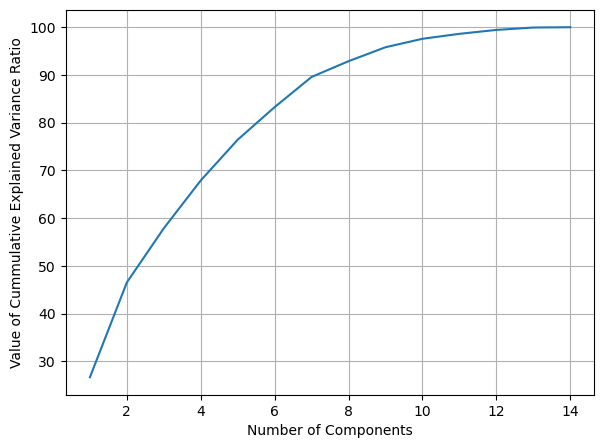

In [44]:
# Membuat plot untuk Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 15), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Value of Cummulative Explained Variance Ratio')

Text(0, 0.5, 'Eigenvalues')

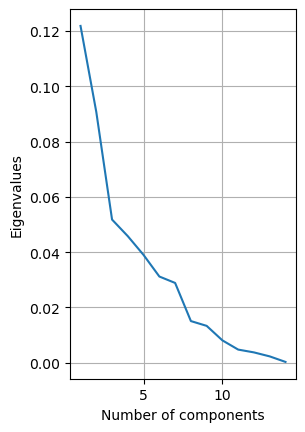

In [45]:
# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 15), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [46]:
# Find out number of components to maintain 90 % of total information
cum_sum = np.cumsum(pca.explained_variance_ratio_)
sum_features = np.argmax(cum_sum >= 0.90) + 1
print("Number of features to retain 90% of the information: ",sum_features)

Number of features to retain 90% of the information:  8


### <u>PCA result when dropping some features which have no correlation with target variable:</u>

In [47]:
# create PCA for second dataset
pca2 = PCA()
pca2.fit(X_train_2_scaled)

PCA()

Text(0, 0.5, 'Value of Cummulative Explained Variance Ratio')

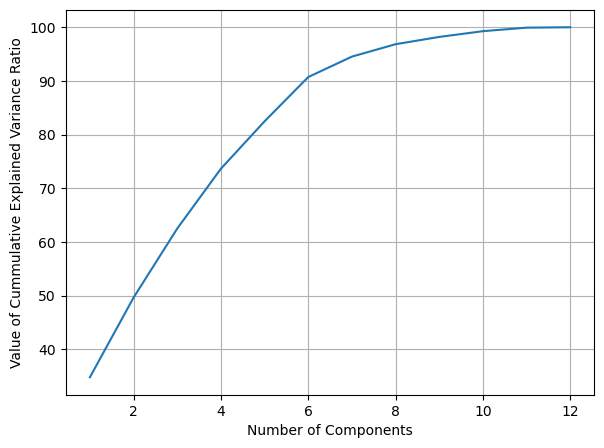

In [48]:
# Membuat plot untuk Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 13), np.cumsum(pca2.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Value of Cummulative Explained Variance Ratio')

Text(0, 0.5, 'Eigenvalues')

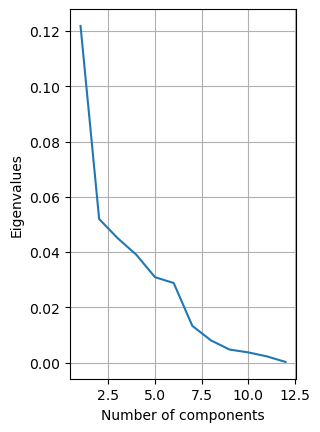

In [49]:
# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 13), pca2.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [50]:
# Find out number of components to maintain 90 % of total information
cum_sum = np.cumsum(pca2.explained_variance_ratio_)
sum_features = np.argmax(cum_sum >= 0.90) + 1
print("Number of features to retain 90% of the information: ",sum_features)

Number of features to retain 90% of the information:  6


In [51]:
# Lakukan PCA model training dengan jumlah komponen yang baru yaitu 6
pca_fix = PCA(n_components=6)
pca_fix.fit(X_train_2_scaled)

X_train_2_scaled_pca = pca_fix.transform(X_train_2_scaled)
X_test_2_scaled_pca = pca_fix.transform(X_test_2_scaled)

### **INSIGHT:**
- Based on the line graphs plotting cummulative explained variance ratio on number of components, it is found that the reduced-feature dataset can create PCA retaining 90% of the total dataset information with less components compared to the complete dataset.

    - The reduced-feature dataset creates 6 principal components to replace 12 features whereas the completed one produces 8 principal components to replace 14 features.

    - Therefore, the train and test set which will be used from this point will be the one with less columns since the dimensionality is smaller leading to less risk of overfitting.

### **d. Combining all features into a dataset:**

`Objective`: for modelling purposes.

In [52]:

# Convert the PCA-transformed array to a DataFrame
pca_train_df = pd.DataFrame(X_train_2_scaled_pca, columns=[f"PC{i+1}" for i in range(X_train_2_scaled_pca.shape[1])])
pca_test_df = pd.DataFrame(X_test_2_scaled_pca, columns=[f"PC{i+1}" for i in range(X_test_2_scaled_pca.shape[1])])

# Concatenate the encoded categorical data DataFrame and the PCA DataFrame along the columns
X_train_combined = pd.concat([X_train_encoded_final, pca_train_df], axis=1)
X_test_combined = pd.concat([X_test_encoded_final, pca_test_df], axis=1)


# Show the combined DataFrame
X_train_combined

,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,PC1,PC2,PC3,PC4,PC5,PC6
0,6.0,0.0,0.0,1.0,0.0,-0.157688,0.606719,0.549718,-0.082916,-0.111581,-0.059444
1,1.0,0.0,0.0,1.0,1.0,-0.188100,-0.105356,-0.130332,-0.019355,-0.043624,-0.066478
2,9.0,0.0,0.0,1.0,1.0,-0.251901,0.452012,-0.026091,0.023113,0.012248,-0.001860
3,1.0,1.0,0.0,0.0,0.0,-0.246096,0.306443,-0.050946,0.040425,-0.017010,-0.105436
4,5.0,0.0,0.0,1.0,0.0,-0.030672,-0.100806,-0.194637,-0.009417,-0.027410,-0.064742
...,...,...,...,...,...,...,...,...,...,...,...
9859,9.0,0.0,0.0,1.0,0.0,0.023573,0.111409,0.344008,-0.107187,-0.129657,-0.087836
9860,1.0,0.0,0.0,1.0,0.0,0.262286,-0.047704,0.145686,-0.170216,-0.019693,0.264586
9861,4.0,0.0,0.0,1.0,0.0,-0.083303,-0.088010,-0.084347,-0.049726,-0.027953,0.027694
9862,9.0,0.0,0.0,1.0,1.0,-0.218961,0.043471,0.296433,-0.147113,-0.102524,0.031738


In [53]:
# real dataset (imbalanced)
X_test_combined

,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,PC1,PC2,PC3,PC4,PC5,PC6
0,3.0,0.0,0.0,1.0,0.0,0.138052,-0.199718,0.032397,0.710813,0.259236,0.011694
1,10.0,0.0,0.0,1.0,1.0,-0.172009,-0.054951,-0.146557,-0.010585,-0.144758,-0.034014
2,7.0,0.0,0.0,1.0,0.0,-0.257961,0.281743,0.048189,0.014965,-0.051520,-0.110545
3,8.0,0.0,0.0,1.0,0.0,-0.077035,-0.078178,-0.187301,-0.009945,-0.026569,-0.060163
4,3.0,0.0,0.0,1.0,0.0,-0.043032,-0.222595,0.004705,0.745319,0.040782,0.051791
...,...,...,...,...,...,...,...,...,...,...,...
2461,3.0,0.0,0.0,1.0,0.0,0.026671,-0.052273,-0.194010,-0.017644,-0.021178,-0.048468
2462,3.0,0.0,0.0,1.0,0.0,0.078535,-0.083539,-0.102082,-0.041904,-0.044648,-0.054294
2463,3.0,0.0,0.0,1.0,1.0,-0.261692,0.963149,0.015810,0.129168,0.022572,-0.149629
2464,3.0,1.0,0.0,0.0,0.0,-0.133877,-0.093692,-0.154727,-0.008392,-0.146482,-0.038537


### **INSIGHT:**
- So, the feature engineering process is successful in reducing the dimension of the dataset from 17 to 11 features.

### **e. Balancing dataset:**

`Objective`: To allow the model having more training on handling a minor class. In this study, it's the False from Revenue. Balancing only implemented on the training set since we want to see if model training with balanced dataset can perform well on test set.

In [54]:
# training set
# set smote for oversampling the minority group
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train_encoded)

# Get count of unique values in the target array (y_train_balanced)
unique, counts = np.unique(y_train_balanced, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts after SMOTE:", class_counts)

Class counts after SMOTE: {0: 8338, 1: 8338}


# **6. MODEL DEFINITION**

<center>CLASSIFICATION MODELS</center>

1. K-Nearest Neighbors (KNN)
It classifies data points based on the majority class among their nearest neighbors in the feature space.
The number of neighbors (k) is a hyperparameter that needs to be specified before training the model.

2. Decision Tree
Decision Tree is a non-parametric supervised learning algorithm used for classification and regression tasks.
It divides the feature space into segments by making sequential decisions based on feature values.
Each decision is made to maximize the information gain or minimize impurity in the resulting subsets.
Support Vector Classifier (SVC):

3. SVC 
It is a supervised learning algorithm used for classification tasks and separates classes in the feature space by constructing hyperplanes with the maximum margin between them. SVC is effective in high-dimensional spaces and is versatile due to its ability to use different kernel functions to map data into higher-dimensional spaces.

<center>ENSEMBLE LEARNING</center>

4. Random Forest 
It is an ensemble learning method used for classification and regression tasks.
It builds multiple decision trees during training and combines their predictions through averaging or voting to improve accuracy and reduce overfitting.
Each decision tree in the Random Forest is trained on a random subset of the training data and a random subset of the features.

5. AdaBoost (Adaptive Boosting):
AdaBoost is an ensemble learning method used for classification tasks.
It combines multiple weak classifiers to create a strong classifier by sequentially training each weak classifier to correct the errors made by the previous ones. Weak classifiers are typically simple models (e.g., decision trees) trained on different subsets of the data.


# **7. MODEL TRAINING**

### 1. <u>Baseline Models</u>

In [55]:
def cross_val_print(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Print the cross-validation scores
    print("Cross-Validation Scores:", scores)

    # Print the mean and standard deviation of the cross-validation scores
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation of Accuracy:", scores.std())


#### a. KNN

In [56]:
# define KNN model
knn_model = KNeighborsClassifier()

# define KNN model
knn_model.fit(X_train_balanced, y_train_balanced)


# show performance measurement for the baseline model
cross_val_print(knn_model, X_train_balanced, y_train_balanced)

Cross-Validation Scores: [0.8809952  0.88125937 0.88155922 0.88665667 0.88845577]
Mean Accuracy: 0.8837852476639378
Standard Deviation of Accuracy: 0.0031361910908511686


#### b. SVM

In [57]:
# define svm model
svm_model = SVC(random_state = 42)

# training
svm_model.fit(X_train_balanced, y_train_balanced)

# show performance measurement for the baseline model
cross_val_print(svm_model, X_train_balanced, y_train_balanced)

Cross-Validation Scores: [0.78986811 0.80749625 0.80509745 0.8041979  0.80089955]
Mean Accuracy: 0.8015118519876753
Standard Deviation of Accuracy: 0.006194128980934399


#### c. Decision Tree

In [58]:
# define decision tree model
dec_tree_model = DecisionTreeClassifier(random_state = 42)

# training
dec_tree_model.fit(X_train_balanced, y_train_balanced)

# show performance measurement for the baseline model
cross_val_print(dec_tree_model, X_train_balanced, y_train_balanced)

Cross-Validation Scores: [0.85221823 0.87376312 0.87016492 0.86776612 0.86626687]
Mean Accuracy: 0.8660358489819838
Standard Deviation of Accuracy: 0.0073584484465414445


#### d. Random Forest

In [59]:
# training model with balanced dataset
# define random forest model
rf_model = RandomForestClassifier(random_state = 42)

# Train the classifier on the training data
rf_model.fit(X_train_balanced, y_train_balanced)

# show performance measurement for the baseline model
cross_val_print(rf_model, X_train_balanced, y_train_balanced)

Cross-Validation Scores: [0.89118705 0.91664168 0.92623688 0.91844078 0.91634183]
Mean Accuracy: 0.9137696439550009
Standard Deviation of Accuracy: 0.011849808250311622


#### e. Boosting Classifier

In [60]:
# define model for AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state = 42)

# Train the classifier on the training data
adaboost_model.fit(X_train_balanced, y_train_balanced)

# show performance measurement for the baseline model
cross_val_print(adaboost_model, X_train_balanced, y_train_balanced)

/Users/catherinemulyadi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/catherinemulyadi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/catherinemulyadi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/catherinemulyadi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

Cross-Validation Scores: [0.81384892 0.83838081 0.83928036 0.83988006 0.83718141]
Mean Accuracy: 0.8337143119087939
Standard Deviation of Accuracy: 0.009974247488812857


### **INSIGHT:**
- Among all baseline models, Random Forest has the best performance since it achieves the highest mean accuracy score at 0.914 with relatively small standard deviation of accuracy that is around 0.01.

### 2. <u>Hyperparameter Tuning Model Pipeline</u>

`Method`: RandomizedSearchCV

`Reason`: it is suitable for random forest since it efficiently explores the hyperparameter space by randomly sampling combinations of hyperparameters.


### Trained with balanced dataset

In [61]:
# make the hyperparameter grid
parameters = {
    'n_estimators': [25,50,75,100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10]   # Minimum number of samples required at each leaf node
}

# conduct a randomized search cross validation
random_search = RandomizedSearchCV(rf_model, param_distributions=parameters, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_balanced, y_train_balanced)

# print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# evaluate the model on the test set
best_model = random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [62]:
# show performance measurement for the tuned model
cross_val_print(best_model, X_train_balanced, y_train_balanced)

Cross-Validation Scores: [0.89118705 0.91664168 0.92623688 0.91844078 0.91634183]
Mean Accuracy: 0.9137696439550009
Standard Deviation of Accuracy: 0.011849808250311622


### Trained with imbalanced dataset

In [63]:
# make the hyperparameter grid
# the parameter followed Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
# based on balanced dataset
parameters = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of the trees
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1]  # Minimum number of samples required at each leaf node
}

# conduct a randomized search cross validation
random_search = RandomizedSearchCV(rf_model, param_distributions=parameters, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_combined, y_train_encoded)

# print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# evaluate the model on the test set
best_model_imbalanced = random_search.best_estimator_

/Users/catherinemulyadi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [64]:
# show performance measurement for the tuned model
cross_val_print(best_model_imbalanced, X_train_combined,y_train_encoded)

Cross-Validation Scores: [0.89457679 0.89204257 0.89609731 0.88748099 0.88995943]
Mean Accuracy: 0.8920314201147541
Standard Deviation of Accuracy: 0.003098710174742004


### **INSIGHT:**
- After hyperparameter tuning with RandomizedSearchCV, it was found that the performance of tuned model is almost the same as the default model. The mean accuracy is the same as the default model, around 0.9137, with standard deviation of accuracy is about 0.01.

- In addition, model trained with balanced dataset performs better than with imbalanced dataset since the mean accuracy is higher (0.9137 > 0.892).

- Based on this finding, the tuned random forest model will be chosen due to its reliability. It has cross validation which can potentially allow model to generalize unseen data better.

# **8. MODEL EVALUATION**

`Metrics`: Recall. It should be at least > 0.5 so that prediction nature is not some random probabilistic result.

`Reason` : Recall or true positive rate, measures the how well the model can correctly identify all positive instances, relevant in scenarios where false negatives are costly. 

For forecasting web visitor purchase decisions, it is crucial to lower false negatives (i.e., fail to recognize visitors who will likely make a purchase) to ensure effective targeting of marketing efforts and generate more revenue. 

Achieving a high recall indicates that the model seamlessly captures a large proportion of visitors who are likely to make a purchase, reducing missed opportunities for customer conversion. 

Hence, optimizing the model for high recall helps prioritize the identification of potential customers and enhance the effectiveness of marketing strategies.

In [65]:
# function to evaluate performance of models
def performance_checker(clf, X, y, classes):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    # make a visualization: confusion matrix to show number of true as well as false positive and negative instances.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    
    # Ensure classes is a list of strings
    if not isinstance(classes, list):
        classes = list(classes)
        
    print(classification_report(y, y_pred, target_names=classes))

### <u>Result of Random Forest Model Trained with Balanced Dataset</u>

`Train Set`

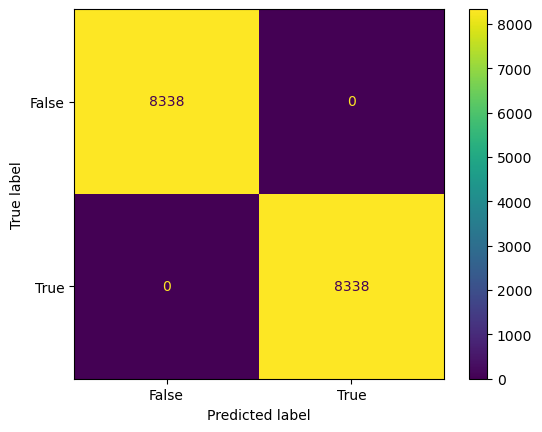

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8338
        True       1.00      1.00      1.00      8338

    accuracy                           1.00     16676
   macro avg       1.00      1.00      1.00     16676
weighted avg       1.00      1.00      1.00     16676



In [66]:
# Convert boolean values to strings
classes = [str(c) for c in label_e.classes_]

# train set result
performance_checker(best_model,X_train_balanced, y_train_balanced, classes)

`Test Set`

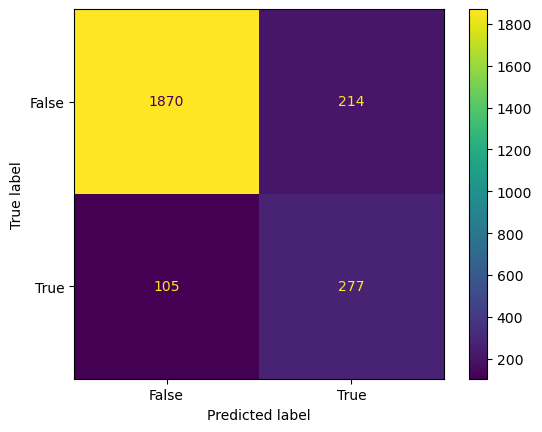

              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2084
        True       0.56      0.73      0.63       382

    accuracy                           0.87      2466
   macro avg       0.76      0.81      0.78      2466
weighted avg       0.89      0.87      0.88      2466



In [67]:
# test set
performance_checker(best_model,X_test_combined, y_test_encoded, classes)

### <u>Result of Random Forest Model Trained with Imbalanced Dataset</u>

`Train Set`

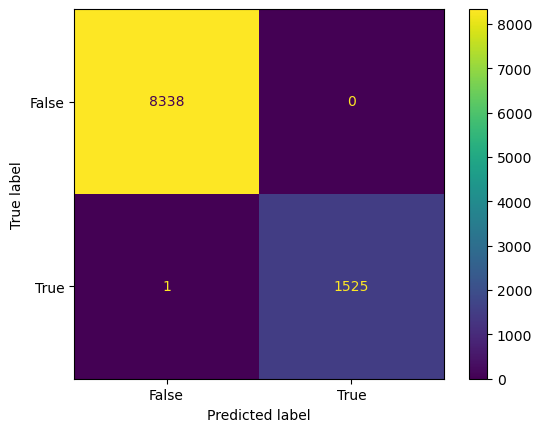

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8338
        True       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



In [68]:
# train set
performance_checker(best_model_imbalanced,X_train_combined, y_train_encoded, classes)

`Test Set`

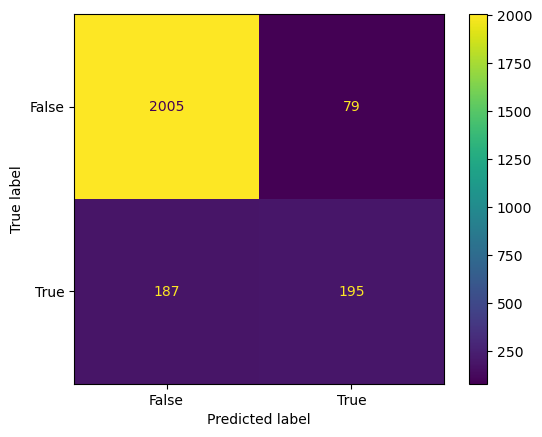

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2084
        True       0.71      0.51      0.59       382

    accuracy                           0.89      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [69]:
# test set
performance_checker(best_model_imbalanced,X_test_combined, y_test_encoded, classes)

### **INSIGHT:**

- To make it easier to refer, let's say:
    - Model A: random forest model trained with balanced dataset.
    - Model B: random forest model trained with imbalanced dataset.

- According to result, Model A performs better than Model B. 
It is observed that when the models are tested, Model A has higher recall score (0.73) than Model B (0.51). 

- This means that Model A can identify more web visitors who will make purchase (Revenue = True) than Model B. It's proven from the confusion matrix that the true positive cases from Model A is higher than Model B (277 > 195). Furthermore, the number of false negative cases from Model A is less than Model B (105 < 187).

- In train results, both model perform with 100% accuracy and 100% recall, but they perform less in tests. These results indicate possibility of overfitting so the model cannot capture the underlying patterns in the data.

- Regardless the possibility of overfitting, the models passed recall score threshold which is 0.5.

# **9. MODEL SAVING**

In [70]:
# # Keep all the important functions for preprocessing and modelling in files.

# # keep model
# with open('model.pkl', 'wb') as file_1:
#   pickle.dump(best_model, file_1)

# # for encoding
# with open('encoding_pipeline.pkl', 'wb') as file_2:
#   pickle.dump(encoding_pipeline, file_2)

# # for target variable encoder
# with open('label_encode_target.pkl', 'wb') as file_3:
#   pickle.dump(label_e, file_3)

# # for balancing dataset
# with open('smote_model.pkl', 'wb') as file_4:
#   pickle.dump(smote, file_4)

# # for scaling
# with open('scaler.pkl', 'wb') as file_5:
#   pickle.dump(scaler_min_2, file_5)

# # for capping
# with open('capping.pkl', 'wb') as file_6:
#   pickle.dump(winsoriser_function, file_6)

# # for PCA
# with open('pca_function.pkl', 'wb') as file_7:
#   pickle.dump(pca_fix, file_7)

# # for column transformer
# with open('column_transformer.pkl', 'wb') as file_8:
#   pickle.dump(column_transformer_process, file_8)

# **10. MODEL INFERENCE**

- Menyiapkan data baru untuk tes performa model.

In [71]:
def create_inference_data(dataset):
    # define random seed
    np.random.seed(42)
    # keep nama kolom tiap dataset
    dataset_columns = dataset.columns.tolist()
    # create empty dictionary kosong
    data_output = {}
    # columns containing integer values
    dataset_int_columns = ['Administrative','Informational','ProductRelated','OperatingSystems','Browser','Region','TrafficType']
    for column in dataset_columns:
        if column == 'Month':
            item_value = np.random.choice(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep','Dec'],20)
            item_value_list = item_value.tolist()
            # insert items into columns
            data_output[column]=item_value_list
        elif column == 'Revenue':
            item_value = np.random.choice([True,False],20)
            item_value_list = item_value.tolist()
            # insert items into columns
            data_output[column]=item_value_list
        elif column == 'VisitorType':
            item_value = np.random.choice(['Returning_Visitor', 'New_Visitor', 'Other'],20)
            item_value_list = item_value.tolist()
            # insert items into columns            
            data_output[column]=item_value_list
        elif column == 'Weekend':
            item_value = np.random.choice([True,False],20)
            item_value_list = item_value.tolist()
            # insert items into columns
            data_output[column]=item_value_list
        elif column in dataset_int_columns:
            max_value = dataset[column].max()
            min_value = dataset[column].min()
            item_value = np.random.randint(min_value,max_value,20)
            item_value_list = item_value.tolist()
            # insert items into columns
            data_output[column]=item_value_list
        else:
            # set the range of randomized data (nilai minimum dan maximum)
            max_value = dataset[column].max()
            min_value = dataset[column].min()
            item_value = np.random.uniform(min_value,max_value,20)
            # konversi ke list
            item_value_list = item_value.tolist()
            # masukkan item yang dirandom dalam key columns
            data_output[column]=item_value_list
    return data_output

In [72]:
# call the function
inf_data = create_inference_data(main_data)

# buat dataframe
inf_df = pd.DataFrame(inf_data)

# show values inside the dataframe
inf_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,6,3296.481110,20,464.588126,187,38765.393917,0.142133,0.043688,201.901069,0.080853,Nov,3,3,8,1,Other,True,True
1,19,2829.264425,8,1925.699495,379,59258.729843,0.022178,0.083302,146.093284,0.369654,Aug,7,9,4,15,Returning_Visitor,False,False
2,14,721.687552,6,1083.881758,492,41651.690564,0.087867,0.176656,23.475662,0.242160,Mar,1,2,3,1,Returning_Visitor,False,False
3,10,617.977607,17,530.121277,40,58533.193143,0.040344,0.064869,91.857390,0.803140,Nov,1,2,3,5,Other,False,True
4,7,623.346078,3,1447.281023,156,54379.961853,0.179153,0.024418,89.310808,0.470301,Feb,3,2,6,16,Returning_Visitor,True,True
5,20,1034.043323,13,79.829325,14,28752.942693,0.095074,0.071260,251.897639,0.983423,Sep,3,6,7,19,Other,False,False
6,6,1783.515922,17,2147.299747,64,6103.721208,0.112655,0.181366,257.673674,0.398824,Sep,3,3,6,4,New_Visitor,True,True
7,25,1468.073132,8,1146.591944,520,23722.549700,0.139103,0.054426,53.572482,0.816432,Mar,4,9,6,3,Returning_Visitor,True,False
8,18,989.815040,20,1007.386133,343,42788.130746,0.027866,0.129538,360.946331,0.798345,Aug,6,4,6,17,New_Visitor,True,True
9,22,2079.535026,1,2362.400946,128,42601.398685,0.120883,0.000104,96.511698,0.150718,Dec,1,1,6,17,Other,False,False


In [73]:
# define X and y
X_inf = inf_df.drop(['Revenue','OperatingSystems','Region'],axis = 1)
y_inf = inf_df['Revenue']

In [74]:
# capping
X_inf_capped =winsoriser_function2.transform(X_inf)

# split categorical and numerical data
X_inf_num = X_inf_capped[num_cols2]
X_inf_cat = X_inf_capped[cat_cols]

In [75]:
# encoding categorical data
X_inf_encoded = encoding_pipeline.transform(X_inf_cat)
X_inf_encoded_final = pd.DataFrame(X_inf_encoded, columns=columns)
# encoding target feature
y_inf_encoded = label_e.transform(y_inf)

In [76]:
# scaling numerical data
X_inf_scaled = scaler_min_2.transform(X_inf_num)

In [77]:
# PCA
X_inf_scaled_pca = pca_fix.transform(X_inf_scaled)

In [78]:
# combine
pca_inf_df = pd.DataFrame(X_inf_scaled_pca, columns=[f"PC{i+1}" for i in range(X_test_2_scaled_pca.shape[1])])

# Concatenate the encoded categorical data DataFrame and the PCA DataFrame along the columns
X_inf_combined = pd.concat([X_inf_encoded_final, pca_inf_df], axis=1)


# Show the combined DataFrame
X_inf_combined

,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,PC1,PC2,PC3,PC4,PC5,PC6
0,9.0,0.0,1.0,0.0,1.0,-0.052078,1.406753,0.133517,0.002649,0.411686,0.853686
1,6.0,0.0,0.0,1.0,0.0,-0.350821,1.434860,1.085264,0.083134,0.908909,0.648484
2,1.0,0.0,0.0,1.0,0.0,0.264481,1.588659,0.137947,0.320617,0.181982,0.187457
3,9.0,0.0,1.0,0.0,0.0,-0.225455,1.194024,0.497118,0.684075,0.306035,0.921050
4,0.0,0.0,0.0,1.0,1.0,0.188458,1.023060,0.887012,0.163781,0.167238,0.956363
5,7.0,0.0,1.0,0.0,0.0,0.094114,0.826185,1.236433,0.546953,0.567740,0.902658
6,7.0,1.0,0.0,0.0,1.0,0.391824,1.457099,0.338945,0.278240,0.422130,0.878127
7,1.0,0.0,0.0,1.0,1.0,-0.018192,1.509289,0.562640,0.678737,1.020222,0.450071
8,6.0,1.0,0.0,0.0,1.0,-0.073390,1.346735,1.154783,0.516312,0.399738,0.850478
9,10.0,0.0,1.0,0.0,0.0,-0.145834,0.894600,0.833240,-0.165644,0.007329,0.944009


In [79]:
# make prediction
prediction = best_model.predict(X_inf_combined)

In [80]:
# print the predictions
print("Predictions:", prediction)

Predictions: [0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1]


# **11. CONCLUSION**
- Answer to Conceptual Questions, Conclusion for EDA, Model Evaluation and Analysis, Model Improvement Strategies

## i. <u>Answer to Conceptual Questions</u>

1. Background and Operation of Bagging: Bagging (Bootstrap Aggregating) is an ensemble learning method aimed at improving model performance by combining the predictions from several independently built models. 

- It is based on the concept of bootstrap sampling, in which the dataset is bootstrapped to create multiple random subsets of the training data. 

<center>How it works?</center>

- Every subset will be utilized for training a different model, like Decision Trees.

- Then, the predictions from each model are aggregated to produce the final prediction. 

- Bagging can effectively reduce variance and overfitting in the model by calculating the mean of predictions from various models, thereby improving generalization on unseen test data.

2. Difference Between Random Forest and Boosting: 

- Random Forest is an ensemble learning method that uses bagging technique to build multiple Decision Trees independently and combines the predictions from each tree. Each tree is constructed using a random subset of available features and a random subset of the training data. On the other hand, 

- AdaBoost is an iterative ensemble method that builds a sequence of weak learners (e.g., decision trees). Each model attempts to correct the prediction errors of the previous model. The models are adjusted adaptively to focus on data that are difficult to predict by the previous model. It tends to perform well in practice and is less prone to overfitting compared to individual weak learners.

- Thus, the main difference between Random Forest and Boosting lies in the way the models are built: Random Forest constructs models independently with parallel training, while Boosting constructs models with sequential training.

3. Cross Validation: Cross Validation is a method used to evaluate the performance of machine learning models by dividing the training data into smaller subsets and performing evaluations repeatedly using these subsets. 

- An example is Cross Validation is k-fold Cross Validation, where the training data is divided into k equally sized subsets, and the model is trained and evaluated k times, each time using one subset as the validation data and the rest as the training data. 

- The goal of Cross Validation is to estimate the model's performance more consistently by ensuring that the model is assessed on various combinations of training and validation data, thereby reducing the likelihood of overfitting or unstable evaluation results.


## ii. <u>EDA Conclusion</u>

- Based on the histograms, we can conclude several points related to the dataset:
    - Most features excluding the target feature, Revenue, have extreme positively skewed data distribution. those features include: Administration_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.

    - The target variable, Revenue, is imbalanced.

    - Some columns have random distributions such as Month and SpecialDay, indicating there are special periods where more sucessful purchases by web visitors happen than other periods.

- From bar graph visualization, we know that both weekend and visitor type are still relevant to our study since they show customers' behavioral pattern in completing a purchase. In instance, successful purchases happen more likely after customers visit the webpage before and during weekdays.

- To prove statistically significant relationship between the features and revenue, we need to refer to p-value from the chi-squared test. All of the p-values are less than 0.05, implying that there is an association between categorical data (Month, Weekend, VisitorType) and Revenue.

- From the correlation matrix, the top five features with strongest correlation with Revenue is:
    - PageValues (0.49)
    - ExitRates (-0.21)
    - ProductRelated (0.16)
    - ProductRelated_Duration (0.15)
    - Administrative (0.14)

## iii. <u>Model Evaluation and Model Analysis</u>

**General:**
- The model is capable of classifying which web visitors can be a potential customer based on their recorded behavioral pattern (duration staying in web page, how fast the exit the web page, etc.) since it passes the recall threshold which is 0.5 or 50%.
- This model will be useful for business owners to evaluate customers' behavior to set up their next marketing strategies by managing their Administrative, Informational, and ProductRelated web pages.

**Specific:**
- Among all baseline models, Random Forest has the best performance since it achieves the highest mean accuracy score at 0.914 with relatively small standard deviation of accuracy that is around 0.01.

- After hyperparameter tuning with RandomizedSearchCV, it was found that the performance of tuned model is almost the same as the default model. The mean accuracy is the same as the default model, around 0.9137, with standard deviation of accuracy is about 0.01.

- In addition, model trained with balanced dataset performs better than with imbalanced dataset since the mean accuracy is higher (0.9137 > 0.892).

- The tuned random forest model will be chosen due to its reliability. It has cross validation which can potentially allow model to generalize unseen data better.

- To make it easier to refer, let's say:
    - Model A: random forest model trained with balanced dataset.
    - Model B: random forest model trained with imbalanced dataset.

- According to result, Model A performs better than Model B. 
It is observed that when the models are tested, Model A has higher recall score (0.73) than Model B (0.51). 

- This means that Model A can identify more web visitors who will make purchase (Revenue = True) than Model B. It's proven from the confusion matrix that the true positive cases from Model A is higher than Model B (277 > 195). Furthermore, the number of false negative cases from Model A is less than Model B (105 < 187).

- In train results, both model perform with 100% accuracy and 100% recall, but they perform less in tests. These results indicate possibility of overfitting so the model cannot capture the underlying patterns in the data.

- Regardless the possibility of overfitting, the models passed recall score threshold which is 0.5.

## iv. <u>Model Improvement Strategies</u>

- There are definitely many ways to improve this model. In instance, it's good to explore these options:
    - Try to examine which features to not to include in the modelling so the model can be more general when facing unseen data.
    - Utilize regularization to anticipate overfitting scenarios.
    - Use ROC curve (AUC) to evaluate the model to have a more comprehensive view regarding the model's performance.
    - Explore advanced model architectures, like deep learning models or gradient boosting machines, to improve predictive performance.